In [12]:
import os, shutil
from pathlib import Path
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

current_dir = Path(os.getcwd()).absolute()
original_dataset_dir = current_dir.joinpath('kaggle_data')
original_train_dir = original_dataset_dir.joinpath('train')
original_test_dir = original_dataset_dir.joinpath('test1')

train_dir = current_dir.joinpath('train')
train_dir.mkdir(parents=True, exist_ok=True)
validation_dir = current_dir.joinpath('validation')
validation_dir.mkdir(parents=True, exist_ok=True)
test_dir = current_dir.joinpath('test')
test_dir.mkdir(parents=True, exist_ok=True)
train_cats_dir = train_dir.joinpath('cats')
train_cats_dir.mkdir(parents=True, exist_ok=True)

train_dogs_dir = train_dir.joinpath('dogs')
train_dogs_dir.mkdir(parents=True, exist_ok=True)

validation_cats_dir  = validation_dir.joinpath('cats')
validation_cats_dir.mkdir(parents=True, exist_ok=True)

validation_dogs_dir = validation_dir.joinpath('dogs')
validation_dogs_dir.mkdir(parents=True, exist_ok=True)

test_cats_dir = test_dir.joinpath('cats')
test_cats_dir.mkdir(parents=True, exist_ok=True)

test_dogs_dir = test_dir.joinpath('dogs')
test_dogs_dir.mkdir(parents=True, exist_ok=True)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = train_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = validation_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = test_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = train_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = validation_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = test_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)

In [14]:
print('total train cat images:', len(os.listdir(train_cats_dir)))
print('total train dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total train cat images: 1000
total train dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data  = validation_generator,
    validation_steps = 50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 22s 220ms/step - loss: 0.6893 - acc: 0.5230 - val_loss: 0.6713 - val_acc: 0.5720
Epoch 2/30
100/100 [==============================] - 21s 213ms/step - loss: 0.6574 - acc: 0.6080 - val_loss: 0.6489 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 21s 209ms/step - loss: 0.6051 - acc: 0.6690 - val_loss: 0.6253 - val_acc: 0.6270
Epoch 4/30
100/100 [==============================] - 21s 206ms/step - loss: 0.5687 - acc: 0.7050 - val_loss: 0.6019 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 21s 210ms/step - loss: 0.5356 - acc: 0.7320 - val_loss: 0.6337 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 21s 209ms/step - loss: 0.5094 - acc: 0.7440 - val_loss: 0.5655 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 21s 208ms/step - loss: 0.4846 - acc: 0.7710 - val_loss: 0.6504 - val_acc: 0.6270
Epoch 8/30
100/100 [==============================] - 2

<Figure size 432x288 with 0 Axes>

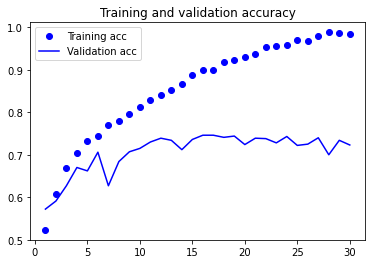

<Figure size 432x288 with 0 Axes>

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

    

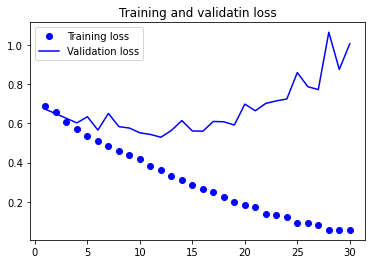

In [23]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validatin loss')
plt.legend()
plt.show()